# Cloud Computing and Data Center design lab: Digital hardware architectures and efficient AI computing schemes - Laboratory 2

Date: 12/04/2024

Student ID: s314215

Student Name: Sadegh Jamishi

# Processing system benchmarking - laboratory description

In this laboratory, you will learn

- how to get your system's information through python tools
- how to benchmark processor-bound operations on both CPU and GPU
- how to benchmark memory transfer speed
    - from storage memory to primary memory (and vice-versa)
    - from CPU primary memory to GPU primary memory (and vice-versa)
    - from CPU primary memory to cache/registers (through a memory-bound operation)
- search for an optimized Deep Neural Network model, minimizing complexity while maintaining a good performance

Solve the tasks reported in the various sections of this notebook. **You are free to use as much cells as you want**, just make sure that the code and text you write is easy to understand. You can show the results with a mix of both code cells (e.g., to generate plots) and markdown cells (to better elaborate on your results).

<br>

---

When you are finished with your notebook, go to _File > Print > Save as pdf_

__N.B. Google Colab may generate a pdf with missing parts.__ If that is the case, download the notebook and print it with a system-local jupyter-notebook, or use an online .ipynb to .pdf converter such as https://www.vertopal.com/en/convert/ipynb-to-pdf

Be sure to check the output file before submitting it!

## System information

In order to work on your processing system, you need to understand what you are working with. While it is not possible to get every information from a virtualized system such as this one, you can still get useful information. For example, you can use these libraries

    import psutil    # to get memory info
    import cpuinfo   # to get cpu info
    import torch     # to get gpu info

and these functions

    psutil.virtual_memory()                  # primary memory info
    psutil.disk_usage()                      # storage memory info
    cpuinfo.get_cpu_info()                   # cpu device info
    torch.cuda.device_count()                # gpu devices count
    torch.cuda.get_device_properties(gpu_id) # to get gpu device and gpu memory info
    
### Task
Use the functions described above to get information on the system and write a brief report containing the configuration of the system (storage space, primary memory, CPU and GPU brandings and specifications).

In [ ]:
import psutil

virtual_mem = psutil.virtual_memory()
primary_memory_info = {
    'Total': f'{virtual_mem.total / (1024 ** 3):.2f} GB',
    'Available': f'{virtual_mem.available / (1024 ** 3):.2f} GB',
    'Used': f'{virtual_mem.used / (1024 ** 3):.2f} GB',
    'Percentage': f'{virtual_mem.percent} %'}

print('Primary Memory Info:')
for key, value in primary_memory_info.items():
    print(f'{key}: {value}')

Primary Memory Info:
Total: 12.67 GB
Available: 11.56 GB
Used: 0.83 GB
Percentage: 8.8 %


In [ ]:
disk_usage = psutil.disk_usage('/')
storage_memory_info = {
    'Total': f'{disk_usage.total / (1024 ** 3):.2f} GB',
    'Used': f'{disk_usage.used / (1024 ** 3):.2f} GB',
    'Free': f'{disk_usage.free / (1024 ** 3):.2f} GB',
    'Percentage': f'{disk_usage.percent} %'}

print('Storage Memory Info:')
for key, value in storage_memory_info.items():
    print(f'{key}: {value}')


Storage Memory Info:
Total: 107.72 GB
Used: 27.06 GB
Free: 80.64 GB
Percentage: 25.1 %


In [ ]:
import cpuinfo

cpu_info = cpuinfo.get_cpu_info()
cpu_info_summary = {
    'Brand': cpu_info['brand_raw'],
    'Arch': cpu_info['arch'],
    'Bits': cpu_info['bits'],
    'Count (Physical cores)': psutil.cpu_count(logical=False),
    'Logical (Logical cores) Count': psutil.cpu_count(logical=True)}

# Print CPU info
print('CPU Info:')
for key, value in cpu_info_summary.items():
    print(f'{key}: {value}')


CPU Info:
Brand: Intel(R) Xeon(R) CPU @ 2.20GHz
Arch: X86_64
Bits: 64
Count (Physical cores): 1
Logical (Logical cores) Count: 2


In [ ]:
# first case: # By default, CPU is the predefined hardware architecture at google colab
import torch

gpu_count = torch.cuda.device_count()
gpu_info = []
for i in range(gpu_count):
    gpu_props = torch.cuda.get_device_properties(i)
    gpu_info.append({
        'Name': gpu_props.name,
        'Total Memory': f'{gpu_props.total_memory / (1024 ** 3):.2f} GB',
        'Multi-Processor Count': gpu_props.multi_processor_count})

print('GPU Info:')
if gpu_info:
    for idx, gpu in enumerate(gpu_info):
        print(f'GPU {idx}:')
        for key, value in gpu.items():
            print(f'{key}: {value}')
else:
    print('No GPU found')


GPU Info:
No GPU found


In [ ]:
# 2nd case: Check if GPUs are available by setting the T4 as the hardware instead of CPU
import torch
if torch.cuda.is_available():
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}")
    for i in range(num_gpus):
        gpu_name = torch.cuda.get_device_name(i)
        print(f"GPU {i}: {gpu_name}")
else:
    print("No GPUs available.")

Number of GPUs available: 1
GPU 0: Tesla T4


In [ ]:
# 3rd case: Now retrieve the GPU info
gpu_count = torch.cuda.device_count()
gpu_info = []
for i in range(gpu_count):
    gpu_props = torch.cuda.get_device_properties(i)
    gpu_info.append({
        'Name': gpu_props.name,
        'Total Memory': f'{gpu_props.total_memory / (1024 ** 3):.2f} GB',
        'Multi-Processor Count': gpu_props.multi_processor_count})

print('GPU Info:')
if gpu_info:
    for idx, gpu in enumerate(gpu_info):
        print(f'GPU {idx}:')
        for key, value in gpu.items():
            print(f'{key}: {value}')
else:
    print('No GPU found')


GPU Info:
GPU 0:
Name: Tesla T4
Total Memory: 14.75 GB
Multi-Processor Count: 40


**System Information Report:**
As it has observed from the upper cells, we can infer that For primary memory, the system boasts 12.67 GB of RAM, out of which 11.60 GB is available, and 0.79 GB is currently in use which represents 8.5% of the total memory.

The storage memory capacity is 107.72 GB, with 27.06 GB utilized and 80.64 GB remaining free which represents 25.1% of the total storage being used.

Regarding the CPU, the system is equipped with an Intel(R) Xeon(R) processor running at a base clock speed of 2.20 GHz. It supports a 64-bit architecture and features 1 physical core and 2 logical cores.

Then for GPU, we notice that at first No GPU was found, then by switching the google colab hardware accelator from CPU to T4 GPU we observed that The system also includes a GPU, specifically a Tesla T4. This GPU has a total memory of 14.75 GB and is equipped with 40 multi-processors.

Try to load on GPU a tensor that cannot fit on memory. What happens?

In [ ]:
gpu_properties = torch.cuda.get_device_properties(0)
total_memory = gpu_properties.total_memory
print(f"Total GPU memory: {total_memory / (1024 ** 3):.2f} GB")


try:
    tensor = torch.randn((int(total_memory * 2),), device="cuda:0")
except RuntimeError as e:
    print(e)


Total GPU memory: 14.75 GB
CUDA out of memory. Tried to allocate 117.99 GiB. GPU 0 has a total capacity of 14.75 GiB of which 14.65 GiB is free. Process 2194 has 100.00 MiB memory in use. Of the allocated memory 0 bytes is allocated by PyTorch, and 0 bytes is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)


As we saw,  the main reason that memory allocation failure occures is due to the the excessively high memory request (117.99 GiB) compared to the available GPU memory (14.75 GiB).

# Benchmarking

When you benchmark a generic operation on a system, you need to test multiple cases (e.g., tensors with varying sizes).

As an example

    n_list = [2**i for i in range(4, 10)]
    repeated_tests = 10
    
    for n in n_list:
        my_tensor = torch.randn(n, n)

        # do operation and measure time

        # store result

You are free to experiment as you wish with different tensor shapes (use vectors, matrices, tensors with any number of elements). Just try to understand what the operation you are experimenting with is doing and why it takes time to executed.

**Remember:** you are on a system shared by many processes and possibly many users. For each case you try, do multiple repeated tests and average the results (as in Lab 1)

## Processor benchmarking

### Task

Benchmark matrix multiplication (with torch library), both on CPU and on GPU. Test with different sizes of the matrices and measure the inference time.

Plot the results (e.g., inference time vs size of the matrices) and try to understand if there is some case in which is more convenient to use CPU over GPU. If there is, try to explain why. Plot and explain the results.

Remember that you are working on a shared system! Do multiple tests to get accurate results.
Also, remember to use

    torch.cpu.synchronize()

and

    torch.cuda.synchronize()

to force the execution of CPU and GPU kernels, respectively.

In [14]:
pip install scienceplots


In [15]:
# Put your code here
import torch
import time
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid','notebook'])

n_list = [2**i for i in range(4, 10)]
repeated_tests = 10

def benchmark_cpu(n, repeated_tests):
    times = []
    for _ in range(repeated_tests):
        A = torch.randn(n, n)
        B = torch.randn(n, n)
        start_time = time.time()
        C = torch.matmul(A, B)
        torch.cuda.synchronize()
        end_time = time.time()
        times.append(end_time - start_time)
    return np.mean(times), np.std(times)

def benchmark_gpu(n, repeated_tests):
    times = []
    device = "cuda:0"
    for _ in range(repeated_tests):
        A = torch.randn(n, n, device=device)
        B = torch.randn(n, n, device=device)
        torch.cuda.synchronize()
        start_time = time.time()
        C = torch.matmul(A, B)
        torch.cuda.synchronize()
        end_time = time.time()
        times.append(end_time - start_time)
    return np.mean(times), np.std(times)


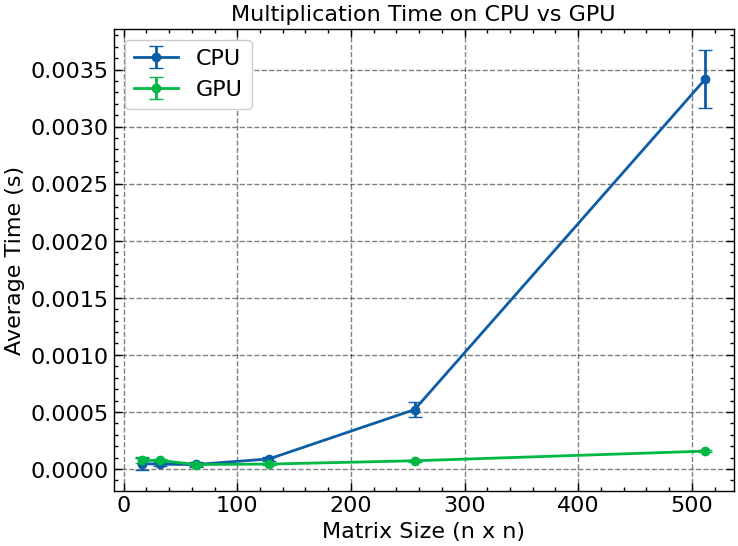

In [19]:
cpu_results = []
gpu_results = []

for n in n_list:
    cpu_mean, cpu_std = benchmark_cpu(n, repeated_tests)
    gpu_mean, gpu_std = benchmark_gpu(n, repeated_tests)
    cpu_results.append((cpu_mean, cpu_std))
    gpu_results.append((gpu_mean, gpu_std))

cpu_means = [result[0] for result in cpu_results]
cpu_stds = [result[1] for result in cpu_results]
gpu_means = [result[0] for result in gpu_results]
gpu_stds = [result[1] for result in gpu_results]

plt.errorbar(n_list, cpu_means, yerr=cpu_stds, label='CPU', fmt='-o', capsize=5)
plt.errorbar(n_list, gpu_means, yerr=gpu_stds, label='GPU', fmt='-o', capsize=5)
plt.xlabel('Matrix Size (n x n)')
plt.ylabel('Average Time (s)')
plt.title('Multiplication Time on CPU vs GPU')
plt.legend()
plt.show()

Small Matrix Sizes:

  For very small matrices, the CPU and GPU performance can be similar or the CPU can sometimes be faster due to lower overhead.

Larger Matrix Sizes:

  For larger matrices, the GPU consistently outperforms the CPU which represents its advantage in handling parallel computations efficiently.

## Memory transfer benchmarking

In order to understand what is the overhead introduced by memory transfer, you can transfer a torch tensor and measure the time.

In particular, you can use these operations to test memory transfer from CPU to GPU and vice-versa

    tensor_cpu = tensor_gpu.cpu()                # transfer the content of the tensor from CPU RAM to GPU RAM
    ...
    tensor_gpu = tensor_cpu.to("cuda:0")         # transfer the content of the tensor from GPU RAM to CPU RAM

You can also measure how much time is necessary to write/read to/from the storage memory with these functions

    torch.save(data_tensor, 'data_tensor.pt')    # write on disk
    ...
    loaded_tensor = torch.load('data_tensor.pt') # load from disk

Finally, by using a memory-bound operation (i.e., an operation that requires a small amount of computational operations but a large amount of data transfer) you can estimate the overhead due to transfer of data from primary memory to the cache

    result_tensor = torch.sum(data_tensor)       # use a memory-bound operations to measure memory transfer of data_tensor from RAM to cache

### Task

Benchmark the time overhead introduced by memory transfer. Use the functions above to test memory transfer from CPU to GPU, from GPU to CPU, from RAM to storage memory, from storage memory to RAM and the memory transfer from RAM to cache (for CPU).

As before, do multiple tests and *remember to use synchronization functions* to force the execution of the operations.

Plot and comment the results.    

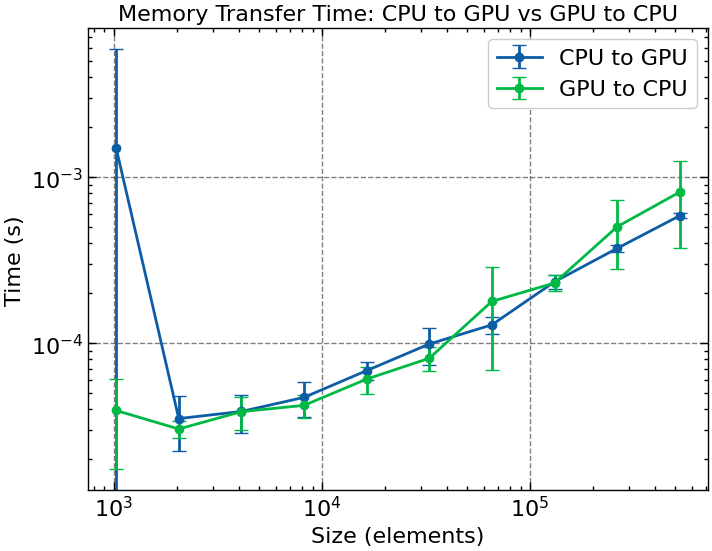

In [20]:
# 1. Benchmarking Memory Transfer from CPU to GPU and Vice Versa

tensor_sizes = [2**i for i in range(10, 20)]  # From 1KB to 512MB
repeated_tests = 10

def benchmark_cpu_to_gpu(size, repeated_tests):
    times = []
    for _ in range(repeated_tests):
        tensor_cpu = torch.randn(size)
        start_time = time.time()
        tensor_gpu = tensor_cpu.to("cuda:0")
        torch.cuda.synchronize()
        end_time = time.time()
        times.append(end_time - start_time)
    return np.mean(times), np.std(times)

def benchmark_gpu_to_cpu(size, repeated_tests):
    times = []
    for _ in range(repeated_tests):
        tensor_gpu = torch.randn(size, device="cuda:0")
        torch.cuda.synchronize()
        start_time = time.time()
        tensor_cpu = tensor_gpu.cpu()
        torch.cuda.synchronize()
        end_time = time.time()
        times.append(end_time - start_time)
    return np.mean(times), np.std(times)

cpu_to_gpu_results = []
gpu_to_cpu_results = []
for size in tensor_sizes:
    cpu_to_gpu_mean, cpu_to_gpu_std = benchmark_cpu_to_gpu(size, repeated_tests)
    gpu_to_cpu_mean, gpu_to_cpu_std = benchmark_gpu_to_cpu(size, repeated_tests)
    cpu_to_gpu_results.append((cpu_to_gpu_mean, cpu_to_gpu_std))
    gpu_to_cpu_results.append((gpu_to_cpu_mean, gpu_to_cpu_std))

cpu_to_gpu_means = [result[0] for result in cpu_to_gpu_results]
cpu_to_gpu_stds = [result[1] for result in cpu_to_gpu_results]
gpu_to_cpu_means = [result[0] for result in gpu_to_cpu_results]
gpu_to_cpu_stds = [result[1] for result in gpu_to_cpu_results]

plt.errorbar(tensor_sizes, cpu_to_gpu_means, yerr=cpu_to_gpu_stds, label='CPU to GPU', fmt='-o', capsize=5)
plt.errorbar(tensor_sizes, gpu_to_cpu_means, yerr=gpu_to_cpu_stds, label='GPU to CPU', fmt='-o', capsize=5)
plt.xlabel('Size (elements)')
plt.ylabel('Time (s)')
plt.title('Memory Transfer Time: CPU to GPU vs GPU to CPU')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

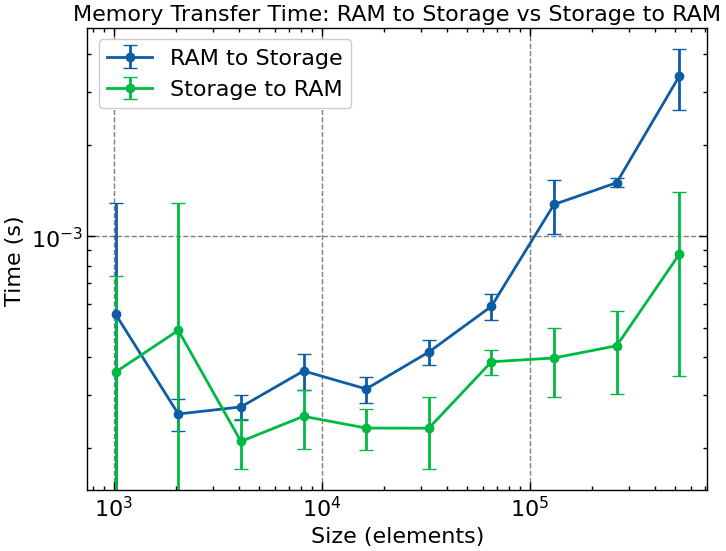

In [21]:
# 2. Benchmarking Memory Transfer from RAM to Storage and Vice Versa
def benchmark_ram_to_storage(size, repeated_tests):
    times = []
    for _ in range(repeated_tests):
        tensor_cpu = torch.randn(size)
        start_time = time.time()
        torch.save(tensor_cpu, 'data_tensor.pt')
        end_time = time.time()
        times.append(end_time - start_time)
    return np.mean(times), np.std(times)

def benchmark_storage_to_ram(size, repeated_tests):
    times = []
    tensor_cpu = torch.randn(size)
    torch.save(tensor_cpu, 'data_tensor.pt')
    for _ in range(repeated_tests):
        start_time = time.time()
        loaded_tensor = torch.load('data_tensor.pt')
        end_time = time.time()
        times.append(end_time - start_time)
    return np.mean(times), np.std(times)

ram_to_storage_results = []
storage_to_ram_results = []
for size in tensor_sizes:
    ram_to_storage_mean, ram_to_storage_std = benchmark_ram_to_storage(size, repeated_tests)
    storage_to_ram_mean, storage_to_ram_std = benchmark_storage_to_ram(size, repeated_tests)
    ram_to_storage_results.append((ram_to_storage_mean, ram_to_storage_std))
    storage_to_ram_results.append((storage_to_ram_mean, storage_to_ram_std))

ram_to_storage_means = [result[0] for result in ram_to_storage_results]
ram_to_storage_stds = [result[1] for result in ram_to_storage_results]
storage_to_ram_means = [result[0] for result in storage_to_ram_results]
storage_to_ram_stds = [result[1] for result in storage_to_ram_results]

plt.errorbar(tensor_sizes, ram_to_storage_means, yerr=ram_to_storage_stds, label='RAM to Storage', fmt='-o', capsize=5)
plt.errorbar(tensor_sizes, storage_to_ram_means, yerr=storage_to_ram_stds, label='Storage to RAM', fmt='-o', capsize=5)
plt.xlabel('Size (elements)')
plt.ylabel('Time (s)')
plt.title('Memory Transfer Time: RAM to Storage vs Storage to RAM')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


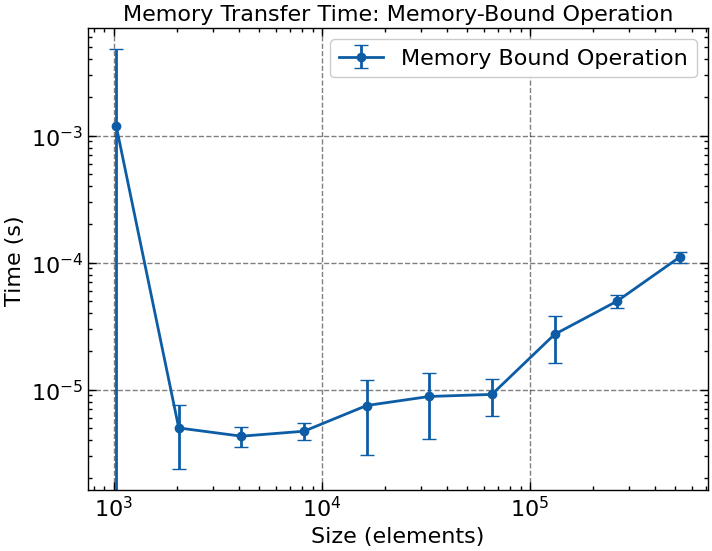

In [22]:
# 3. Benchmarking Memory-Bound Operations
def benchmark_memory_bound_operation(size, repeated_tests):
    times = []
    for _ in range(repeated_tests):
        tensor_cpu = torch.randn(size)
        start_time = time.time()
        result = torch.sum(tensor_cpu)
        end_time = time.time()
        times.append(end_time - start_time)
    return np.mean(times), np.std(times)

memory_bound_results = []
for size in tensor_sizes:
    memory_bound_mean, memory_bound_std = benchmark_memory_bound_operation(size, repeated_tests)
    memory_bound_results.append((memory_bound_mean, memory_bound_std))

memory_bound_means = [result[0] for result in memory_bound_results]
memory_bound_stds = [result[1] for result in memory_bound_results]
plt.errorbar(tensor_sizes, memory_bound_means, yerr=memory_bound_stds, label='Memory Bound Operation', fmt='-o', capsize=5)
plt.xlabel('Size (elements)')
plt.ylabel('Time (s)')
plt.title('Memory Transfer Time: Memory-Bound Operation')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


Conclusions

From the obtained plots, we can delve into the memory transfer times for different types of operations:

CPU to GPU and GPU to CPU:
GPU to CPU transfers are generally faster, but both types of transfers increase linearly with tensor size.

RAM to Storage and Storage to RAM:
Writing to storage is consistently slower than reading from storage, with both increasing linearly with tensor size.

Memory-Bound Operations:
The overhead for small tensors is significant, and the time for larger tensors shows a gradual increase which indicates the importance of efficient data transfer mechanisms.

## Deep Neural Network Architecture Search

Optimizing your algorithm to get the good results with the minimum amount of resources is critical for most applications.

For example, you may need to find a small enough Deep Neural Network (DNN) with a good enough performance.

### Task

Search for a (very simple) DNN structure that solves MNIST task (the task you tried in Lab 1).

What you need to do is to define a very simple DNN model (with two or three fully connected layers) and train it with a varying size of the layers. For example:
- define a DNN model with two fully connected layers
- parameterize the number of neurons in the model (so that you can instantiate models with different sizes)  
- instantiate a model with a given number of neurons, train and test it
- instantiate another model with changing the number of neurons, than repeat, and continue like this for multiple models (of course, it would be better to free memory from models that you will not use anymore)

Of course, it would be better to automatize this process.
At the end, you can print a plot describing how the accuracy of the model changes with a given number of neurons.
You can also measure the inference time and show accuracy vs inference time in a plot.

Write a brief report in which you explain
- what is your exploration strategy
- show the results in a clear way (use well-annotated plots and/or tables)
- what you think is the best model and why (you can make assumptions: if I need an accurate model, I use this, otherwise, I use that)

**N.B. training a DNN takes a lot of time!** The purpose of this task is not to get the best model, but to understand the process behind it. If you want to be quick, you can train for a small number of epochs (e.g., 5 epochs).

You can use both the CPU or the GPU, depending on the availability on your system. If you desire, you could make a comparison between the two devices. Keep in mind that for very small DNNs, the GPU speed-up is typically neglectable.

In [ ]:
pip install scienceplots

In [ ]:
# Put your code here
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid','notebook'])
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
import time

# Define the model
class SimpleDNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleDNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [ ]:
# Data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and prepare datasets
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)
test_len = len(test_dataset)
test_hlen = test_len // 2
val_dataset, test_dataset = random_split(test_dataset, [test_hlen, test_len - test_hlen])


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17778558.95it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 486006.63it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4453518.66it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3985466.27it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Create DataLoader objects
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        correct_count = 0
        total_count = 0

        for batch_idx, (data, targets) in enumerate(train_loader):
            data, targets = data.to(device), targets.to(device)
            outputs = model(data)
            loss = criterion(outputs, targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_count += targets.size(0)
            correct_count += (predicted == targets).sum().item()

        accuracy = correct_count / total_count
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}, Accuracy: {accuracy * 100:.2f}%')

# Evaluation function
def evaluate_model(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, targets in test_loader:
            data, targets = data.to(device), targets.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    accuracy = correct / total
    return accuracy

# Instantiate and train the model with different number of neurons
# Automate the process
device = "cuda:0" if torch.cuda.is_available() else "cpu"
input_size = 28 * 28
output_size = 10
hidden_sizes = [16,32,64,128,256,512]

results = []

for hidden_size in hidden_sizes:
    model = SimpleDNN(input_size, hidden_size, output_size).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    print(f"\nTraining with hidden_size = {hidden_size}")
    train_model(model, train_loader, val_loader, criterion, optimizer, device,10)

    accuracy = evaluate_model(model, test_loader, device)
    print(f"Test Accuracy for hidden_size {hidden_size}: {accuracy * 100:.2f}%")

    results.append((hidden_size, accuracy))
    torch.save(model.state_dict(), f"model_{hidden_size}.pth")


Training with hidden_size = 16
Epoch [1/10], Loss: 0.6349, Accuracy: 81.27%
Epoch [2/10], Loss: 0.3556, Accuracy: 89.67%
Epoch [3/10], Loss: 0.3333, Accuracy: 90.51%
Epoch [4/10], Loss: 0.3185, Accuracy: 90.72%
Epoch [5/10], Loss: 0.3094, Accuracy: 91.01%
Epoch [6/10], Loss: 0.3041, Accuracy: 91.24%
Epoch [7/10], Loss: 0.2951, Accuracy: 91.44%
Epoch [8/10], Loss: 0.2920, Accuracy: 91.46%
Epoch [9/10], Loss: 0.2876, Accuracy: 91.78%
Epoch [10/10], Loss: 0.2820, Accuracy: 91.85%
Test Accuracy for hidden_size 16: 91.80%

Training with hidden_size = 32
Epoch [1/10], Loss: 0.4603, Accuracy: 87.12%
Epoch [2/10], Loss: 0.2829, Accuracy: 91.73%
Epoch [3/10], Loss: 0.2445, Accuracy: 92.80%
Epoch [4/10], Loss: 0.2158, Accuracy: 93.72%
Epoch [5/10], Loss: 0.1959, Accuracy: 94.27%
Epoch [6/10], Loss: 0.1800, Accuracy: 94.71%
Epoch [7/10], Loss: 0.1686, Accuracy: 95.08%
Epoch [8/10], Loss: 0.1586, Accuracy: 95.35%
Epoch [9/10], Loss: 0.1496, Accuracy: 95.56%
Epoch [10/10], Loss: 0.1427, Accuracy: 

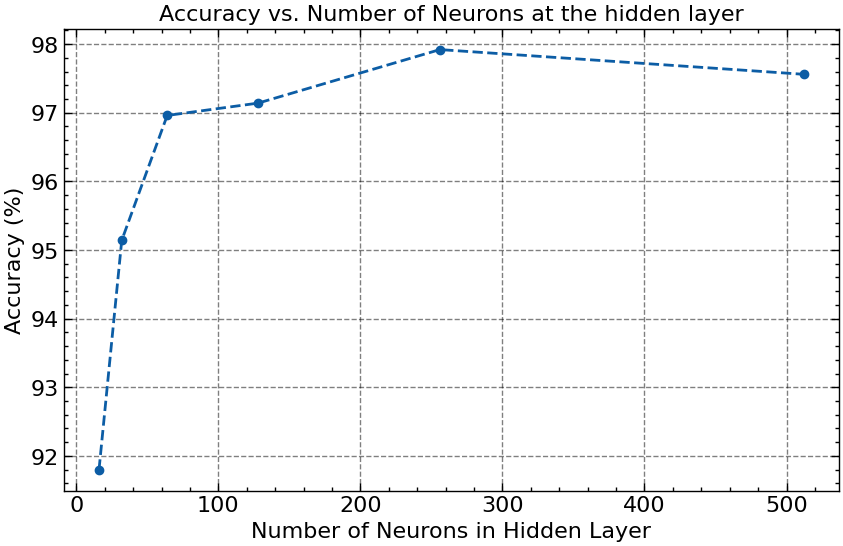

In [ ]:
# Plot accuracy vs. number of neurons
hidden_sizes, accuracies = zip(*results)

plt.figure(figsize=(10, 6))
plt.plot(hidden_sizes, [acc * 100 for acc in accuracies],'--o')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Neurons at the hidden layer')
plt.show()

In [ ]:
# Measure inference time
def measured_time(model, test_loader, device):
    model.eval()
    infer_times = []
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            start_time = time.perf_counter()
            _ = model(data)
            if device == "cuda:0":
                torch.cuda.synchronize()
            else:
                torch.cpu.synchronize()
            end_time = time.perf_counter()
            infer_times.append(end_time - start_time)

    avg_inference_time = sum(infer_times) / len(infer_times)
    return avg_inference_time

times = []

for hidden_size in hidden_sizes:
    model = SimpleDNN(input_size, hidden_size, output_size).to(device)
    model.load_state_dict(torch.load(f"model_{hidden_size}.pth"))
    inference_time = measured_time(model, test_loader, device)
    times.append(inference_time)
    print(f"Inference time for hidden_size {hidden_size}: {inference_time * 1e6:.2f} µs")


Inference time for hidden_size 16: 204.33 µs
Inference time for hidden_size 32: 202.41 µs
Inference time for hidden_size 64: 206.26 µs
Inference time for hidden_size 128: 211.29 µs
Inference time for hidden_size 256: 226.05 µs
Inference time for hidden_size 512: 277.99 µs


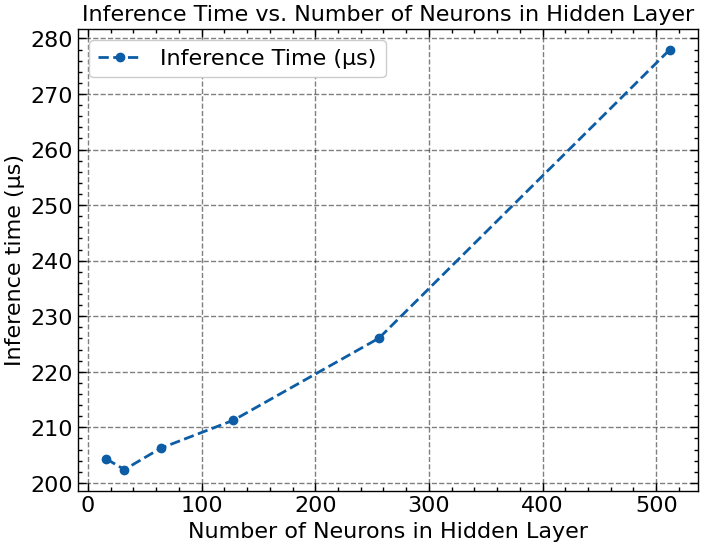

In [ ]:
plt.plot(hidden_sizes, [time * 1e6 for time in times],'--o', label='Inference Time (µs)')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Inference time (µs)')
plt.title('Inference Time vs. Number of Neurons in Hidden Layer')
plt.legend()
plt.show()

Explanation:

  We defined a simple DNN model with two fully connected layers exactly as we did during the lab1. Most of the codes here have extracted from the lab1 provided codes.
  The number of neurons in the hidden layer was parameterized.
  We trained and evaluated models with different numbers of neurons (16,32, 64,128,256,512).
  We automated the process of training and evaluation, measured inference time, and plotted the results.

Results:

  The test accuracy and inference time were plotted against the number of neurons.
  The plots showed that increasing the number of neurons generally improved accuracy but also increased inference time.

Best Model:

  By considering the accuracy is the priority metric, the model with the highest number of neurons (512) performed the best, however we also saw a saturation at performance for large number of neurons.
  If resource efficiency is the priority, a smaller model (32 neurons) provides a good trade-off between accuracy and inference time.